In [14]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import seaborn as sns
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd


In [2]:
# Load a picture to check the shape and indicate the path to the data folder
img = mpimg.imread(r"C:\Users\Dell\Downloads\archive (1)\data\SeaLake_1.jpg")
image_dir = "C:/Users/Dell/Downloads/archive (1)/data"
CATEGORIES = ['cloudy', 'desert', 'green_area', 'water']

img.shape 

(64, 64, 3)

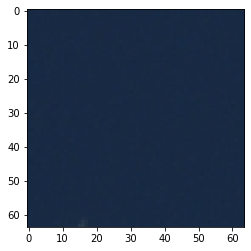

In [3]:
plt.imshow(img)

In [4]:
img_shape = img.shape
IMG_SIZE = img.shape[0]
CHANNELS = img_shape[2]
BATCH_SIZE = 64

print(IMG_SIZE )
print(CHANNELS )

64
3


In [5]:
# Split data into train and test 

train_data = tf.keras.preprocessing.image_dataset_from_directory(image_dir,
                                                                 image_size = (64,64),
                                                                 #labels = 'inferred',
                                                                 label_mode = 'int',
                                                                 batch_size= 32,
                                                                 shuffle = True,
                                                                 validation_split = 0.3,
                                                                 seed = 27,
                                                                 subset = "training"
                                                                 )


test_data = tf.keras.preprocessing.image_dataset_from_directory(image_dir,
                                                                image_size = (64,64),
                                                                #label_mode = "categorical",
                                                                #labels = 'inferred',
                                                                label_mode = 'int',
                                                                batch_size = 32,
                                                                shuffle = True,
                                                                seed = 27,
                                                                validation_split = 0.3,
                                                                subset = 'training'
                                                                )





print('Classes : ',train_data.class_names)


Found 5631 files belonging to 4 classes.
Using 3942 files for training.
Found 5631 files belonging to 4 classes.
Using 3942 files for training.
Classes :  ['cloudy', 'desert', 'green_area', 'water']


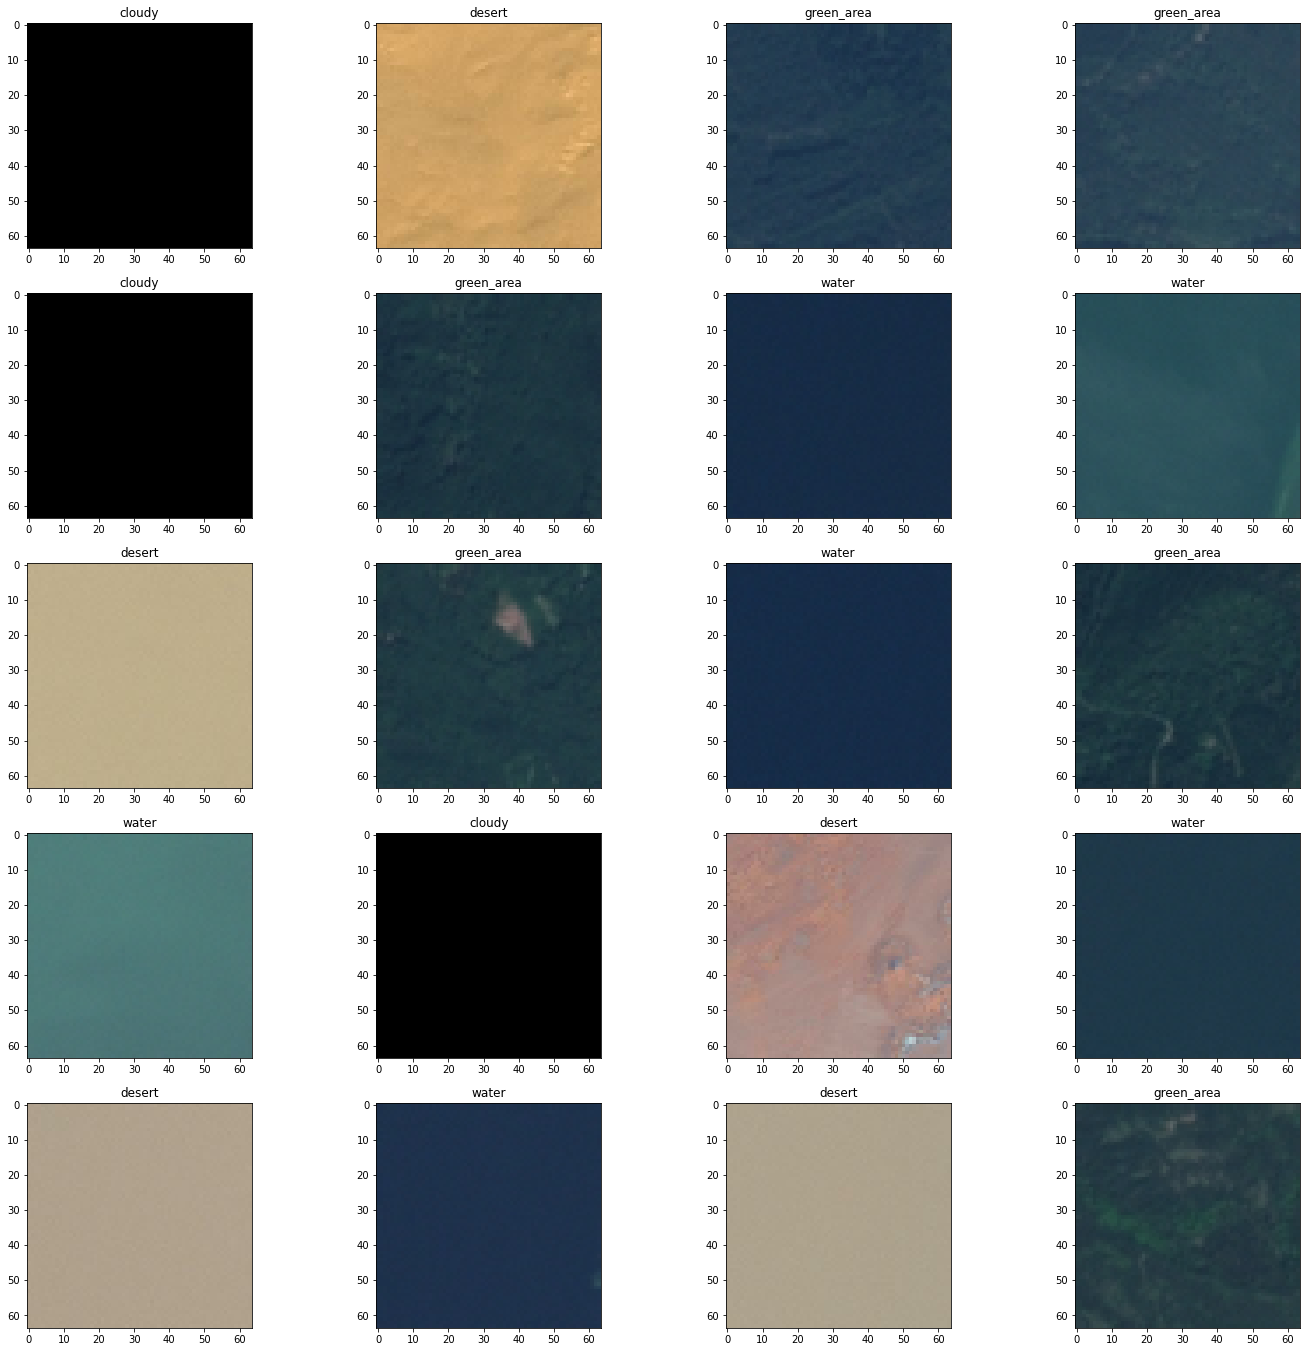

In [6]:
#Displaying the train data sample 

plt.figure(figsize=(24,24))

for image, label in train_data.take(1):
  
  for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(train_data.class_names[(label[i])]) 
    
  

In [7]:
rescale = tf.keras.Sequential([layers.Rescaling(1./255)])
augment = tf.keras.Sequential([
    preprocessing.RandomFlip(mode='horizontal'),
    preprocessing.RandomFlip(mode='vertical'),
    preprocessing.RandomRotation(factor=0.3),
])

In [8]:
#model inclusion and variables notation 

input_shape = img_shape
n_classes =4
model = Sequential([rescale,
augment])


In [9]:
# leyers of Neural network  custom build 
model = Sequential([rescale,
augment, 
layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
layers.MaxPool2D((2,2)),
layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Flatten(),
layers.Dense(128),
layers.Dense(n_classes, "softmax")])

In [10]:
#Compilation of the NN model 

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])


In [11]:
#Learning a neural network

early_stopping = EarlyStopping(monitor="accuracy", patience=10)

history = model.fit(train_data , validation_data= test_data,
          epochs=50,
          callbacks=[early_stopping]
          )



Epoch 1/50
124/124 [==============================] - 15s 109ms/step - loss: 0.3833 - accuracy: 0.8075 - val_loss: 0.4556 - val_accuracy: 0.8143
Epoch 2/50
124/124 [==============================] - 14s 112ms/step - loss: 0.2454 - accuracy: 0.8886 - val_loss: 0.2267 - val_accuracy: 0.9031
Epoch 3/50
124/124 [==============================] - 14s 111ms/step - loss: 0.2212 - accuracy: 0.9023 - val_loss: 0.2479 - val_accuracy: 0.9099
Epoch 4/50
124/124 [==============================] - 14s 112ms/step - loss: 0.2050 - accuracy: 0.9072 - val_loss: 0.1739 - val_accuracy: 0.9145
Epoch 5/50
124/124 [==============================] - 14s 113ms/step - loss: 0.1844 - accuracy: 0.9219 - val_loss: 0.1309 - val_accuracy: 0.9528
Epoch 6/50
124/124 [==============================] - 14s 114ms/step - loss: 0.1600 - accuracy: 0.9290 - val_loss: 0.1772 - val_accuracy: 0.9297
Epoch 7/50
124/124 [==============================] - 18s 141ms/step - loss: 0.1471 - accuracy: 0.9346 - val_loss: 0.1177 - val_ac

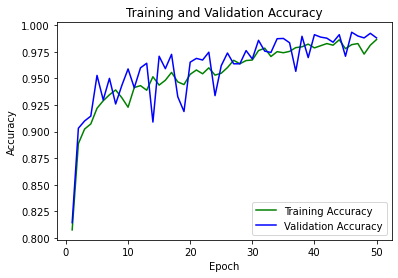

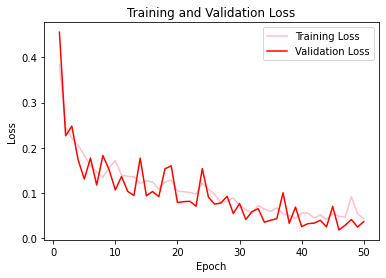

In [12]:
#Result  plot 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)


plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()


#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

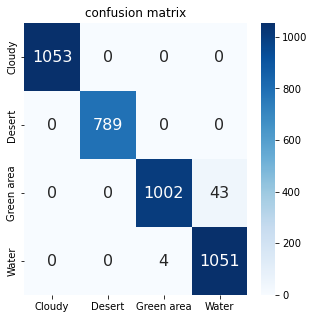

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1053
         1.0       1.00      1.00      1.00       789
         2.0       1.00      0.96      0.98      1045
         3.0       0.96      1.00      0.98      1055

    accuracy                           0.99      3942
   macro avg       0.99      0.99      0.99      3942
weighted avg       0.99      0.99      0.99      3942



In [15]:
true = np.array([])
pred = np.array([])

i = 0
for data, labels in test_data :
    i += 1
    y = np.argmax(model.predict(data), axis=1)
    true = np.append(true, labels)
    pred = np.append(pred, y)
  
    if i == test_data.cardinality().numpy() + 1:
        break

cf_matrix = confusion_matrix(true,pred)
df_cf_matrix = pd.DataFrame(cf_matrix, index = [i for i in range(4)],
                  columns = [i for i in range(4)])

fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(df_cf_matrix, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='d')
ax.set_xticklabels(('Cloudy','Desert','Green area','Water'))
ax.set_yticklabels(('Cloudy','Desert','Green area','Water'))


plt.title('confusion matrix')

plt.show()

print(classification_report(true,pred)) # 0 = Cloudy, 1 = desert, 2 = green_area, 3 = water

In [17]:
# Neural network bulid 2  
model_2 = Sequential([rescale,
augment, 
layers.Conv2D(32,kernel_size =(3,3),padding='valid', activation='relu', input_shape = input_shape),
layers.MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'),
layers.Dropout(0.4),
layers.Conv2D(64,(3,3), activation='relu', padding='valid'),
layers.MaxPooling2D(pool_size=(2,2), strides=2,padding = 'valid'),
layers.Dropout(0.6),
layers.Conv2D(64,(3,3), activation='relu', padding='valid'),
layers.Dropout(0.8),
layers.Flatten(),
layers.Dense(128),
layers.Activation('softmax')])


In [18]:
model_2.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])


In [19]:

early_stopping = EarlyStopping(monitor="accuracy", patience=10)

history_2 = model_2.fit(train_data , validation_data= test_data,
          epochs=50,
          callbacks=[early_stopping]
          )


Epoch 1/50
124/124 [==============================] - 17s 126ms/step - loss: 0.7847 - accuracy: 0.6509 - val_loss: 0.3956 - val_accuracy: 0.8361
Epoch 2/50
124/124 [==============================] - 16s 125ms/step - loss: 0.2891 - accuracy: 0.8612 - val_loss: 0.2473 - val_accuracy: 0.9008
Epoch 3/50
124/124 [==============================] - 16s 130ms/step - loss: 0.2338 - accuracy: 0.8924 - val_loss: 0.3149 - val_accuracy: 0.8625
Epoch 4/50
124/124 [==============================] - 16s 128ms/step - loss: 0.2077 - accuracy: 0.9059 - val_loss: 0.2398 - val_accuracy: 0.9008
Epoch 5/50
124/124 [==============================] - 16s 131ms/step - loss: 0.1993 - accuracy: 0.9074 - val_loss: 0.2324 - val_accuracy: 0.8990
Epoch 6/50
124/124 [==============================] - 17s 140ms/step - loss: 0.1904 - accuracy: 0.9105 - val_loss: 0.2588 - val_accuracy: 0.8760
Epoch 7/50
124/124 [==============================] - 16s 132ms/step - loss: 0.1662 - accuracy: 0.9231 - val_loss: 0.1808 - val_ac

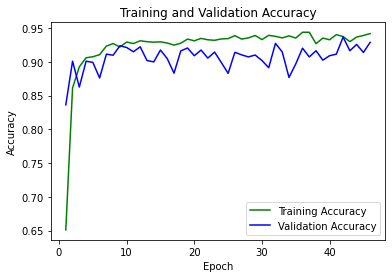

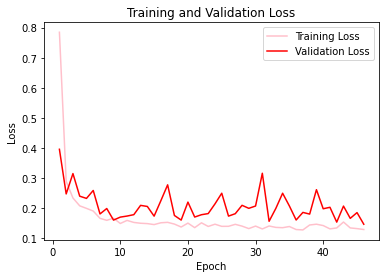

In [20]:
#Result  plot 
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss) + 1)


plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()


#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

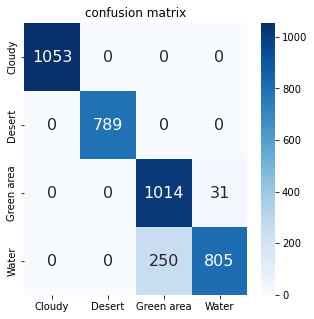

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1053
         1.0       1.00      1.00      1.00       789
         2.0       0.80      0.97      0.88      1045
         3.0       0.96      0.76      0.85      1055

    accuracy                           0.93      3942
   macro avg       0.94      0.93      0.93      3942
weighted avg       0.94      0.93      0.93      3942



In [21]:
true = np.array([])
pred = np.array([])

i = 0
for data, labels in test_data :
    i += 1
    y = np.argmax(model_2.predict(data), axis=1)
    true = np.append(true, labels)
    pred = np.append(pred, y)
  
    if i == test_data.cardinality().numpy() + 1:
        break

cf_matrix = confusion_matrix(true,pred)
df_cf_matrix = pd.DataFrame(cf_matrix, index = [i for i in range(4)],
                  columns = [i for i in range(4)])

fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(df_cf_matrix, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='d')
ax.set_xticklabels(('Cloudy','Desert','Green area','Water'))
ax.set_yticklabels(('Cloudy','Desert','Green area','Water'))


plt.title('confusion matrix')

plt.show()

print(classification_report(true,pred)) # 0 = Cloudy, 1 = desert, 2 = green_area, 3 = water

In [22]:
model_2.evaluate(test_data)

124/124 [==============================] - 3s 26ms/step - loss: 0.1465 - accuracy: 0.9287


[0.14653000235557556, 0.9287163615226746]

In [23]:
model.evaluate(test_data)

124/124 [==============================] - 3s 27ms/step - loss: 0.0367 - accuracy: 0.9881


[0.0366799458861351, 0.9880771040916443]

In [24]:
model.save(r"C:\Users\Dell\Downloads\archive (1)")

INFO:tensorflow:Assets written to: C:\Users\Dell\Downloads\archive (1)\assets
